In [1]:
import numpy as np
#from qiskit.ml.datasets import wine
from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance
from qiskit_machine_learning.algorithms import QSVC
#from qiskit.utils.components.multiclass_extensions import AllPairs
#from qiskit.aqua.utils.dataset_helper import get_feature_dimension

from qiskit_algorithms.utils import algorithm_globals

algorithm_globals.random_seed = 12345

In [2]:
# General imports
import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# scikit-learn imports
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Qiskit imports
from qiskit import Aer, execute
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
from qiskit_machine_learning.kernels import QuantumKernel

In [3]:
import os
import numpy as np
from PIL import Image

def collect_images(root_folder):
    image_list = []
    for root, dirs, files in os.walk(root_folder):
        for file in files:
            if file.endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions as needed
                image_list.append(os.path.join(root, file))
    return image_list

def images_to_npz(image_files, output_file):
    images_as_np = []
    for img_file in image_files:
        try:
            img = Image.open(img_file)
            img_array = np.array(img)
            images_as_np.append(img_array)
        except Exception as e:
            print(f"Error processing {img_file}: {e}")

    return images_as_np

# Define paths for NPC and PC folders
npc_folder_path = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/NPC'
pc_folder_path = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/PC'

# Collect image files from the NPC and PC folders
npc_image_files = collect_images(npc_folder_path)
pc_image_files = collect_images(pc_folder_path)

# Convert and save images to .npz files for NPC folder
npc_output_npz_file = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/NPC/train_images.npz'
npc_images_as_np = images_to_npz(npc_image_files, npc_output_npz_file)
npc_labels = np.zeros(len(npc_images_as_np), dtype=int)  # Assign label 0 for NPC images

# Convert and save images to .npz files for PC folder
pc_output_npz_file = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/PC/train_images.npz'
pc_images_as_np = images_to_npz(pc_image_files, pc_output_npz_file)
pc_labels = np.ones(len(pc_images_as_np), dtype=int)  # Assign label 1 for PC images

# Merge data and labels for NPC and PC folders
images_data = np.concatenate((npc_images_as_np, pc_images_as_np))
labels = np.concatenate((npc_labels, pc_labels))

# Save images data and labels to a single .npz file
output_npz_file = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/train_images.npz'
np.savez(output_npz_file, images=images_data, labels=labels)


<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [31]:
import os
import numpy as np
from PIL import Image

# Function to load and preprocess images from a folder
def load_images_to_npz(folder_path, label):
    image_files = []
    labels = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):  # Adjust extensions if needed
                image_files.append(os.path.join(root, file))
                labels.append(label)

    images_as_np = []
    for img_file in image_files:
        try:
            img = Image.open(img_file).convert('L')  # Convert to grayscale
            img = img.resize((28, 28))  # Resize images to 28x28 pixels if necessary
            img_array = np.array(img)
            images_as_np.append(img_array)
        except Exception as e:
            print(f"Error processing {img_file}: {e}")

    return np.array(images_as_np), np.array(labels)

# Define paths for both directories
npc_folder = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/NPC'
pc_folder = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/PC'

# Load and preprocess images for NPC and PC folders
npc_images, npc_labels = load_images_to_npz(npc_folder, label=0)
pc_images, pc_labels = load_images_to_npz(pc_folder, label=1)

# Concatenate images and labels from both folders
all_images = np.concatenate((npc_images, pc_images))
all_labels = np.concatenate((npc_labels, pc_labels))

# Ensure images are reshaped to (28, 28) if they are not already
all_images = all_images.reshape(-1, 28, 28)

# Save images and labels as .npz file
output_file = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/all_images.npz'
np.savez(output_file, train_images=all_images, labels=all_labels)


In [3]:
# Load MNIST dataset
data_folder = '/Users/temitopeadeniyi/Documents/my documents/Encoding/LEPset/labeled/'
file_name = 'Pancreatic.npz'
DATA_PATH = os.path.join(data_folder, file_name)
data = np.load(DATA_PATH, allow_pickle=True)

# Access the arrays within the .npz file
sample_train = data['train_images']
labels_train = data['labels']

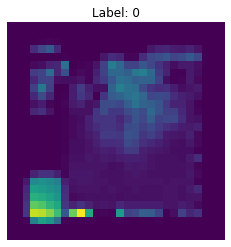

In [5]:
import matplotlib.pyplot as plt

# Assuming you want to plot and save the first image in the dataset
image_to_plot = sample_train[0]  # Change the index to plot a different image

# Display the image using Matplotlib
plt.imshow(image_to_plot)  # Assuming images are grayscale
plt.axis('off')  # Turn off axis labels
plt.title(f"Label: {labels_train[0]}")  # Show the label of the image
plt.show()  # Display the image

# Save the plotted image as a PNG file
#plt.imsave('sample_image.png', image_to_plot, cmap='gray')  # Save the image as a PNG file


In [165]:
sample_train.shape

(3500, 28, 28)

In [166]:
import numpy as np

# Assuming you already have the sample_train and labels_train numpy arrays loaded

counts_per_label = {0: 0, 1: 0}  # Assuming labels are integers, adjust as needed
filtered_sample_train = []
filtered_labels_train = []

# Iterate through the data to filter by label and save 800 counts of each label
for label, image in zip(labels_train, sample_train):
    if counts_per_label[label] < 800:
        counts_per_label[label] += 1
        filtered_sample_train.append(image)
        filtered_labels_train.append(label)

    # Break the loop once 800 counts of each label are saved
    if all(count >= 800 for count in counts_per_label.values()):
        break

# Verify the counts of each label in the filtered data
print("Counts per label in filtered data:")
for label, count in counts_per_label.items():
    print(f"Label {label}: {count}")
    
# Convert the lists to arrays if needed
filtered_sample_train = np.array(filtered_sample_train)
filtered_labels_train = np.array(filtered_labels_train)


Counts per label in filtered data:
Label 0: 800
Label 1: 800


In [167]:
# Split train data
sample_train, sample_val, labels_train, labels_val = train_test_split(
    filtered_sample_train, filtered_labels_train, test_size=0.2, random_state=42)

In [168]:
sample_train.shape

(1280, 28, 28)

In [169]:
sample_val.shape

(320, 28, 28)

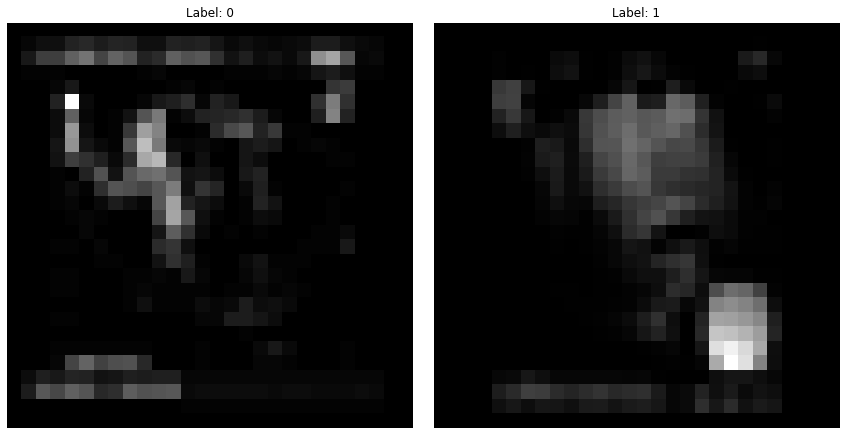

In [170]:
import matplotlib.pyplot as plt

# Define a list of labels to choose from (0, 1)
labels_to_plot = [0, 1]

# Initialize a variable to keep track of the plotted samples
samples_plotted = 0

# Create a new figure
plt.figure(figsize=(12, 6))

# Iterate through the labels
for label in labels_to_plot:
    # Find the index of the first sample with the specified label
    sample_index = np.where(labels_train == label)[0][0]
    
    # Select the sample
    single_sample = sample_train[sample_index]
    
    # Create a subplot for the current sample
    plt.subplot(1, len(labels_to_plot), samples_plotted + 1)
    
    # Display the image and label
    plt.imshow(single_sample, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    
    # Increment the samples_plotted counter
    samples_plotted += 1

# Show the entire plot
plt.tight_layout()
plt.show()


In [171]:
num_samples, num_rows, num_cols = sample_train.shape
sample_train = sample_train.reshape(num_samples, -1)
sample_val = sample_val.reshape(sample_val.shape[0], -1)
#sample_test = sample_test.reshape(sample_test.shape[0], -1)

In [172]:
# Standardize
ss = StandardScaler()
sample_train = ss.fit_transform(sample_train)
sample_val = ss.transform(sample_val)
#sample_test = ss.transform(sample_test)


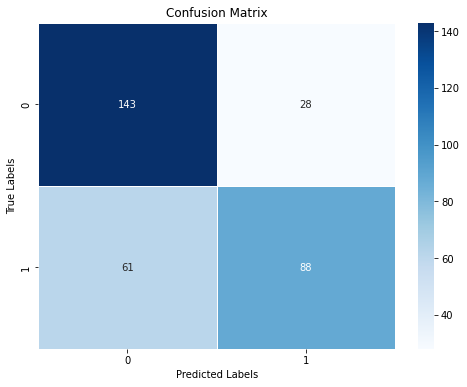

Accuracy: 0.721875
Precision: 0.7586206896551724
Recall: 0.5906040268456376


In [12]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='poly') # Linear Kernel

#Train the model using the training sets
clf.fit(sample_train, labels_train)

#Predict the response for test dataset
y_pred = clf.predict(sample_val)
predictions = [round(value) for value in y_pred]


from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(labels_val, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.savefig("Confusion Matrix for classical SVC.png")
plt.show()

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(labels_val, predictions))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(labels_val, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(labels_val, y_pred))

In [28]:
print("Image data shape:", sample_train.shape)

Image data shape: (1280, 784)


In [173]:
# Reduce dimensions
N_DIM = 10
pca = PCA(n_components=N_DIM)
sample_train = pca.fit_transform(sample_train)
sample_val = pca.transform(sample_val)
#sample_test = pca.transform(sample_test)

# Normalize
mms = MinMaxScaler((-1, 1))
sample_train = mms.fit_transform(sample_train)
sample_val = mms.transform(sample_val)
#sample_test = mms.transform(sample_test)

In [69]:
pauli_map = PauliFeatureMap(feature_dimension=N_DIM, reps=1, paulis = ['X', 'Y', 'ZZ'])
pauli_kernel = QuantumKernel(feature_map=pauli_map, quantum_instance=Aer.get_backend('statevector_simulator'))

In [70]:
qsvc1 = QSVC(quantum_kernel=pauli_kernel)
qsvc1.fit(sample_train ,labels_train)

QSVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', max_iter=-1,
     probability=False,
     quantum_kernel=<qiskit_machine_learning.kernels.quantum_kernel.QuantumKernel object at 0x7fb221f14310>,
     random_state=12345, shrinking=True, tol=0.001, verbose=False)

In [71]:
y_pred = qsvc1.predict(sample_train)

In [72]:
from sklearn.metrics import accuracy_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
accuracy_test = accuracy_score(labels_train, y_pred)

print(f'Accuracy for training dataset: {accuracy_test}')

Accuracy for training dataset: 0.96015625


In [73]:
# Calculate accuracy for test dataset
y_pred = qsvc1.predict(sample_val)

In [74]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels
accuracy_test = accuracy_score(labels_val, y_pred)

print(f'Accuracy for test dataset: {accuracy_test}')

Accuracy for test dataset: 0.69375


In [45]:
from sklearn import metrics 
# Calculate precision, recall, and F1 score for each class
precision = metrics.precision_score(labels_val, y_pred, average= 'macro')
recall = metrics.recall_score(labels_val, y_pred, average= 'macro')
f1_score = metrics.f1_score(labels_val, y_pred, average= 'macro')

print(f'Precision for each class: {precision}')
print(f'Recall for each class: {recall}')
print(f'F1 Score for each class: {f1_score}')

Precision for each class: 0.7244343714587159
Recall for each class: 0.7254209348875544
F1 Score for each class: 0.7244726233806895


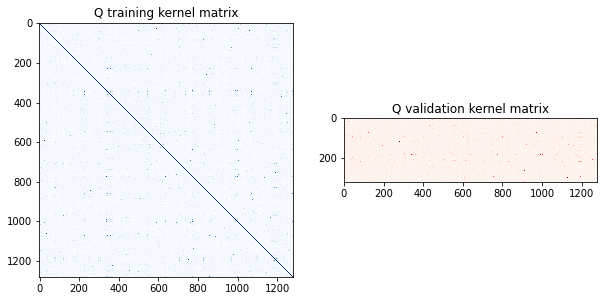

In [75]:
matrix_train = pauli_kernel.evaluate(x_vec=sample_train)
matrix_val = pauli_kernel.evaluate(x_vec=sample_val, y_vec=sample_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(np.asmatrix(matrix_train),
              interpolation='nearest', origin='upper', cmap='Blues')
axs[0].set_title("Q training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_val),
              interpolation='nearest', origin='upper', cmap='Reds')
axs[1].set_title("Q validation kernel matrix")
plt.savefig("Quantum kernels.png")
plt.show()

In [76]:
pauli_svc = SVC(kernel='precomputed')
pauli_svc.fit(matrix_train, labels_train)
predictions = pauli_svc.predict(matrix_val)
pauli_score = pauli_svc.score(matrix_val, labels_val)

print(f'Precomputed kernel classification test score: {pauli_score*100}%')

Precomputed kernel classification test score: 69.375%


In [77]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming you've already trained the model as in your provided code snippet

# Calculate predictions
predictions = pauli_svc.predict(matrix_val)

accuracy_test = accuracy_score(labels_val, predictions)

print(f'Accuracy for test dataset: {accuracy_test}')
# Calculate F1 score
f1 = f1_score(labels_val, predictions)

# Calculate precision
precision = precision_score(labels_val, predictions)

# Calculate recall
recall = recall_score(labels_val, predictions)

# Print scores
print(f'F1 Score: {f1}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy for test dataset: 0.69375
F1 Score: 0.6858974358974358
Precision: 0.656441717791411
Recall: 0.7181208053691275


In [80]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pennylane.templates import RandomLayers


In [174]:
n_epochs = 30   # Number of optimization epochs
n_layers = 4    # Number of random layers


SAVE_PATH = "/content/Encoding" # Data saving folder
images_dir = '/content/drive/MyDrive/Images'
PREPROCESS = True           # If False, skip quantum processing and load data from SAVE_PATH
np.random.seed(0)           # Seed for NumPy random number generator


In [187]:
dev = qml.device("default.qubit", wires=10)
rand_params = np.random.uniform(high=2 * np.pi, size=(n_layers, 10))

#@qml.qnode(dev, interface="autograd")
def circuit(phi):
    for j in range(10):
    # Apply encoding individually for each sample
        #phi = phi / np.linalg.norm(phi)
        #qml.RY(2 * np.arcsin(phi[j]), wires=j)
    #qml.PauliX(j)
    #for j in range(9):
        #qml.CNOT(wires=[j, j+1])
        amplitude = complex(np.cos(phi[j]), np.sin(phi[j]))
        qml.AmplitudeEmbedding([amplitude], wires=range(10), pad_with=0.0, normalize=True)
    #qml.AngleEmbedding(np.pi *phi, wires=range(5))
    #qml.RX(2 * np.arcsin(phi[j]), wires=j)

    # Apply the random quantum circuit
    RandomLayers(rand_params, wires=list(range(10)))
    # Measurement producing 5 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(10)]

In [188]:
# Compute quantum features for the entire training dataset at once
q_train_images = np.array([circuit(phi) for phi in sample_train])
q_test_images = np.array([circuit(phi) for phi in sample_val])


In [179]:
# Replace NaN values in the quantum features with zeros
q_train_images = np.nan_to_num(q_train_images)
q_test_images = np.nan_to_num(q_test_images)

In [180]:
q_train_images.shape

(1280, 10)

In [181]:
q_test_images.shape

(320, 10)

In [182]:
# Train the SVM classifier with precomputed kernel
pauli_svc = SVC(kernel='precomputed')
pauli_svc.fit(np.dot(q_train_images, q_train_images.T), labels_train)


TypeError: unsupported operand type(s) for *: 'ExpectationMP' and 'ExpectationMP'

In [189]:
# Train the SVM classifier with precomputed kernel
pauli_svc = SVC(kernel='precomputed')
pauli_svc.fit(q_train_images, labels_train)


TypeError: float() argument must be a string or a number, not 'ExpectationMP'

In [ ]:
pauli_kernel = QuantumKernel(feature_map=pauli_map, quantum_instance=Aer.get_backend('statevector_simulator'))

In [191]:
import pennylane as qml
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Define the quantum device
dev = qml.device("default.qubit", wires=10)

# Define the quantum circuit as a QNode
#@qml.qnode(dev)
def circuit(phi):
    for j in range(10):
        qml.AmplitudeEmbedding(np.pi * phi, wires=range(10), pad_with=0.0, normalize=True)

    # Apply the random quantum circuit
    RandomLayers(rand_params, wires=list(range(10)))
    # Measurement producing 10 classical output values
    return [qml.expval(qml.PauliZ(j)) for j in range(10)]

# Assuming you have 'sample_train', 'sample_val', 'labels_train', and 'labels_val'

# Compute quantum features for the entire training dataset at once
q_train_images = np.array([circuit(phi) for phi in sample_train])
q_test_images = np.array([circuit(phi) for phi in sample_val])

# Train the SVM classifier with precomputed kernel
pauli_svc = SVC(kernel='precomputed')
pauli_svc.fit(np.dot(q_train_images, q_train_images.T), labels_train)


TypeError: unsupported operand type(s) for *: 'ExpectationMP' and 'ExpectationMP'